# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Fadhel Muhammad Apriansyah
- Email: fmaprianyah3@gmail.com
- Id Dicoding: fadhelmuhammada

## Persiapan

### Menyiapkan library yang dibutuhkan

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.utils import resample

import pickle

### Menyiapkan data yang akan diguankan

## Data Understanding

Pertanyaan yang akan dicari jawabannya dalan proyek ini

- Apa faktor yang menyebabkan siswa melakukan dropout ?

Dataset ini memiliki keterangan seperti berikut:

- Marital status - The marital status of the student. (Categorical) 1 – single 2 – married 3 – widower 4 – divorced 5 – facto union 6 – legally separated

- Application mode - The method of application used by the student. (Categorical) 1 - 1st phase - general contingent 2 - Ordinance No. 612/93 5 - 1st phase - special contingent (Azores Island) 7 - Holders of other higher courses 10 - Ordinance No. 854-B/99 15 - International student (bachelor) 16 - 1st phase - special contingent (Madeira Island) 17 - 2nd phase - general contingent 18 - 3rd phase - general contingent 26 - Ordinance No. 533-A/99, item b2 (Different Plan) 27 - Ordinance No. 533-A/99, item b3 (Other Institution) 39 - Over 23 years old 42 - Transfer 43 - Change of course 44 - Technological specialization diploma holders 51 - Change of institution/course 53 - Short cycle diploma holders 57 - Change of institution/course (International)

- Application order	 - The order in which the student applied. (Numerical) Application order (between 0 - first choice; and 9 last choice)

- Course - The course taken by the student. (Categorical) 33 - Biofuel Production Technologies 171 - Animation and Multimedia Design 8014 - Social Service (evening attendance) 9003 - Agronomy 9070 - Communication Design 9085 - Veterinary Nursing 9119 - Informatics Engineering 9130 - Equinculture 9147 - Management 9238 - Social Service 9254 - Tourism 9500 - Nursing 9556 - Oral Hygiene 9670 - Advertising and Marketing Management 9773 - Journalism and Communication 9853 - Basic Education 9991 - Management (evening attendance)

- Daytime/evening attendance - Whether the student attends classes during the day or in the evening. (Categorical) 1 – daytime 0 - evening

- Previous qualification - The qualification obtained by the student before enrolling in higher education. (Categorical) 1 - Secondary education 2 - Higher education - bachelor's degree 3 - Higher education - degree 4 - Higher education - master's 5 - Higher education - doctorate 6 - Frequency of higher education 9 - 12th year of schooling - not completed 10 - 11th year of schooling - not completed 12 - Other - 11th year of schooling 14 - 10th year of schooling 15 - 10th year of schooling - not completed 19 - Basic education 3rd cycle (9th/10th/11th year) or equiv. 38 - Basic education 2nd cycle (6th/7th/8th year) or equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 42 - Professional higher technical course 43 - Higher education - master (2nd cycle)

- Previous qualification (grade) - Grade of previous qualification (between 0 and 200)

- Nacionality - The nationality of the student. (Categorical) 1 - Portuguese; 2 - German; 6 - Spanish; 11 - Italian; 13 - Dutch; 14 - English; 17 - Lithuanian; 21 - Angolan; 22 - Cape Verdean; 24 - Guinean; 25 - Mozambican; 26 - Santomean; 32 - Turkish; 41 - Brazilian; 62 - Romanian; 100 - Moldova (Republic of); 101 - Mexican; 103 - Ukrainian; 105 - Russian; 108 - Cuban; 109 - Colombian

- Mother's qualification - The qualification of the student's mother. (Categorical) 1 - Secondary Education - 12th Year of Schooling or Eq. 2 - Higher Education - Bachelor's Degree 3 - Higher Education - Degree 4 - Higher Education - Master's 5 - Higher Education - Doctorate 6 - Frequency of Higher Education 9 - 12th Year of Schooling - Not Completed 10 - 11th Year of Schooling - Not Completed 11 - 7th Year (Old) 12 - Other - 11th Year of Schooling 14 - 10th Year of Schooling 18 - General commerce course 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. 22 - Technical-professional course 26 - 7th year of schooling 27 - 2nd cycle of the general high school course 29 - 9th Year of Schooling - Not Completed 30 - 8th year of schooling 34 - Unknown 35 - Can't read or write 36 - Can read without having a 4th year of schooling 37 - Basic education 1st cycle (4th/5th year) or equiv. 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 41 - Specialized higher studies course 42 - Professional higher technical course 43 - Higher Education - Master (2nd cycle) 44 - Higher Education - Doctorate (3rd cycle)

- Father's qualification - The qualification of the student's father. (Categorical) 1 - Secondary Education - 12th Year of Schooling or Eq. 2 - Higher Education - Bachelor's Degree 3 - Higher Education - Degree 4 - Higher Education - Master's 5 - Higher Education - Doctorate 6 - Frequency of Higher Education 9 - 12th Year of Schooling - Not Completed 10 - 11th Year of Schooling - Not Completed 11 - 7th Year (Old) 12 - Other - 11th Year of Schooling 13 - 2nd year complementary high school course 14 - 10th Year of Schooling 18 - General commerce course 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. 20 - Complementary High School Course 22 - Technical-professional course 25 - Complementary High School Course - not concluded 26 - 7th year of schooling 27 - 2nd cycle of the general high school course 29 - 9th Year of Schooling - Not Completed 30 - 8th year of schooling 31 - General Course of Administration and Commerce 33 - Supplementary Accounting and Administration 34 - Unknown 35 - Can't read or write 36 - Can read without having a 4th year of schooling 37 - Basic education 1st cycle (4th/5th year) or equiv. 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 41 - Specialized higher studies course 42 - Professional higher technical course 43 - Higher Education - Master (2nd cycle) 44 - Higher Education - Doctorate (3rd cycle)

- Mother's occupation - The occupation of the student's mother. (Categorical) 0 - Student 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 2 - Specialists in Intellectual and Scientific Activities 3 - Intermediate Level Technicians and Professions 4 - Administrative staff 5 - Personal Services, Security and Safety Workers and Sellers 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 7 - Skilled Workers in Industry, Construction and Craftsmen 8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 10 - Armed Forces Professions 90 - Other Situation 99 - (blank) 122 - Health professionals 123 - teachers 125 - Specialists in information and communication technologies (ICT) 131 - Intermediate level science and engineering technicians and professions 132 - Technicians and professionals, of intermediate level of health 134 - Intermediate level technicians from legal, social, sports, cultural and similar services 141 - Office workers, secretaries in general and data processing operators 143 - Data, accounting, statistical, financial services and registry-related operators 144 - Other administrative support staff 151 - personal service workers 152 - sellers 153 - Personal care workers and the like 171 - Skilled construction workers and the like, except electricians 173 - Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like 175 - Workers in food processing, woodworking, clothing and other industries and crafts 191 - cleaning workers 192 - Unskilled workers in agriculture, animal production, fisheries and forestry 193 - Unskilled workers in extractive industry, construction, manufacturing and transport 194 - Meal preparation assistants

- Father's occupation - The occupation of the student's father. (Categorical) 0 - Student 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 2 - Specialists in Intellectual and Scientific Activities 3 - Intermediate Level Technicians and Professions 4 - Administrative staff 5 - Personal Services, Security and Safety Workers and Sellers 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 7 - Skilled Workers in Industry, Construction and Craftsmen 8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 10 - Armed Forces Professions 90 - Other Situation 99 - (blank) 101 - Armed Forces Officers 102 - Armed Forces Sergeants 103 - Other Armed Forces personnel 112 - Directors of administrative and commercial services 114 - Hotel, catering, trade and other services directors 121 - Specialists in the physical sciences, mathematics, engineering and related techniques 122 - Health professionals 123 - teachers 124 - Specialists in finance, accounting, administrative organization, public and commercial relations 131 - Intermediate level science and engineering technicians and professions 132 - Technicians and professionals, of intermediate level of health 134 - Intermediate level technicians from legal, social, sports, cultural and similar services 135 - Information and communication technology technicians 141 - Office workers, secretaries in general and data processing operators 143 - Data, accounting, statistical, financial services and registry-related operators 144 - Other administrative support staff 151 - personal service workers 152 - sellers 153 - Personal care workers and the like 154 - Protection and security services personnel 161 - Market-oriented farmers and skilled agricultural and animal production workers 163 - Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence 171 - Skilled construction workers and the like, except electricians 172 - Skilled workers in metallurgy, metalworking and similar 174 - Skilled workers in electricity and electronics 175 - Workers in food processing, woodworking, clothing and other industries and crafts 181 - Fixed plant and machine operators 182 - assembly workers 183 - Vehicle drivers and mobile equipment operators 192 - Unskilled workers in agriculture, animal production, fisheries and forestry 193 - Unskilled workers in extractive industry, construction, manufacturing and transport 194 - Meal preparation assistants 195 - Street vendors (except food) and street service providers

- Admission grade - Admission grade (between 0 and 200)

- Displaced - Whether the student is a displaced person. (Categorical) 1 – yes 0 – no

- Educational special needs	 - Whether the student has any special educational needs. (Categorical) 1 – yes 0 – no

- Debtor - Whether the student is a debtor. (Categorical) 1 – yes 0 – no

- Tuition fees up to date - Whether the student's tuition fees are up to date. (Categorical) 1 – yes 0 – no

- Gender - The gender of the student. (Categorical) 1 – male 0 – female

- Scholarship holder - Whether the student is a scholarship holder. (Categorical) 1 – yes 0 – no

- Age at enrollment - The age of the student at the time of enrollment. (Numerical)

- International - Whether the student is an international student. (Categorical) 1 – yes 0 – no

- Curricular units 1st sem (credited) - The number of curricular units credited by the student in the first semester. (Numerical)

- Curricular units 1st sem (enrolled) - The number of curricular units enrolled by the student in the first semester. (Numerical)

- Curricular units 1st sem (evaluations) - The number of curricular units evaluated by the student in the first semester. (Numerical)

- Curricular units 1st sem (approved) - The number of curricular units approved by the student in the first semester. (Numerical)

## Data Preparation / Preprocessing

In [90]:
# Membaca data
df = pd.read_csv('data.csv', delimiter=';')
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [91]:
# Mengecek data yang kosong
df.isna().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


In [92]:
# Mengecek data duplikat
df.duplicated().any()

np.False_

In [93]:
# Membuat instance dari LabelEncoder
label_encoder = LabelEncoder()

# Menggunakan LabelEncoder untuk melakukan encoding pada target array
df['Status'] = label_encoder.fit_transform(df['Status'])


In [94]:
# Cetak mapping dari label ke nilai yang diencode
print("Mapping Label ke Nilai yang diencode:")
for label, value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{label}: {value}")

# Cetak target array yang sudah diencode
print("\nTarget Array yang sudah diencode:")
print(df['Status'])

Mapping Label ke Nilai yang diencode:
Dropout: 0
Enrolled: 1
Graduate: 2

Target Array yang sudah diencode:
0       0
1       2
2       0
3       2
4       2
       ..
4419    2
4420    0
4421    0
4422    2
4423    2
Name: Status, Length: 4424, dtype: int64


In [95]:
# Mengecek informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [96]:
df.columns

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime_evening_attendance', 'Previous_qualification',
       'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification',
       'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
       'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_wit

In [97]:
df.describe(include='all')

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,1.178119
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,0.888243
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,0.000000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,0.000000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,1.000000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,2.000000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000,2.000000


Terdapat nilai yang aneh pada kolom Curricular_units_1st_sem_grade dan Curricular_units_2nd_sem_grade sehingga akan dihapus

In [98]:
df = df.drop(columns=['Curricular_units_1st_sem_grade', 'Curricular_units_2nd_sem_grade'])
df.describe(include='all')

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,0.150316,11.566139,1.228029,0.001969,1.178119
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,0.753774,2.663850,1.382711,2.269935,0.888243
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,0.000000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,0.000000,9.400000,0.300000,-1.700000,0.000000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,0.000000,11.100000,1.400000,0.320000,1.000000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,0.000000,13.900000,2.600000,1.790000,2.000000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,12.000000,16.200000,3.700000,3.510000,2.000000


In [99]:
# Variabel Marital_status akan dikategorikan sebagai data tipe kategori karena merupakan data nominal
df['Marital_status'].unique()

array([1, 2, 4, 3, 5, 6])

In [100]:
# Variabel Application_mode akan dikategorikan sebagai data tipe kategori karena merupakan data nominal
df['Application_mode'].unique()

array([17, 15,  1, 39, 18, 53, 44, 51, 43,  7, 42, 16,  5,  2, 10, 57, 26,
       27])

In [101]:
# Variabel Application_order akan dikategorikan sebagai data tipe kategori karena merupakan data ordinal
df['Application_order'].unique()

array([5, 1, 2, 4, 3, 6, 9, 0])

In [102]:
# Variabel Course akan dikategorikan sebagai data tipe kategori karena merupakan data nominal
df['Course'].unique()

array([ 171, 9254, 9070, 9773, 8014, 9991, 9500, 9238, 9670, 9853, 9085,
       9130, 9556, 9147, 9003,   33, 9119])

In [103]:
# Variabel Daytime_evening_attendance akan dikategorikan sebagai data tipe kategori karena merupakan data nominal
df['Daytime_evening_attendance'].unique()

array([1, 0])

In [104]:
# Variabel Previous_qualification akan dikategorikan sebagai data tipe kategori karena merupakan data nominal
df['Previous_qualification'].unique()

array([ 1, 19, 42, 39, 10,  3, 40,  2,  4, 12, 43, 15,  6,  9, 38,  5, 14])

In [105]:
# Variabel Nacionality akan dikategorikan sebagai data tipe kategori karena merupakan data nominal
df['Nacionality'].unique()

array([  1,  62,   6,  41,  26, 103,  13,  25,  21, 101,  11,  22,  32,
       100,  24, 109,   2, 108, 105,  14,  17])

In [106]:
# Variabel Mothers_qualification akan dikategorikan sebagai data tipe kategori karena merupakan data nominal
df['Mothers_qualification'].unique()

array([19,  1, 37, 38,  3,  4, 42,  2, 34, 12, 40,  9,  5, 39, 11, 41, 30,
       14, 35, 36,  6, 10, 29, 43, 18, 22, 27, 26, 44])

In [107]:
# Variabel Fathers_qualification akan dikategorikan sebagai data tipe kategori karena merupakan data nominal
df['Fathers_qualification'].unique()

array([12,  3, 37, 38,  1, 19,  5,  4, 34,  2, 39, 11,  9, 36, 26, 40, 14,
       20, 35, 41, 22, 13, 29, 43, 18, 42, 10,  6, 30, 25, 44, 33, 27, 31])

In [108]:
# Variabel Mothers_occupation akan dikategorikan sebagai data tipe kategori karena merupakan data nominal
df['Mothers_occupation'].unique()

array([  5,   3,   9,   7,   4,   1, 125,   0,   6,   2,  90,   8, 141,
       175,  99, 191, 151, 194, 192, 132, 152, 134,  10, 143, 123, 173,
       193, 122, 144, 131, 171, 153])

In [109]:
# Variabel Fathers_occupation akan dikategorikan sebagai data tipe kategori karena merupakan data nominal
df['Fathers_occupation'].unique()

array([  9,   3,   7,  10,   5,   8,   4,   1,   2, 124,   6,   0,  90,
       175, 121,  99, 144, 195, 192, 161, 193, 151, 182, 132, 131, 194,
       163, 135, 143, 171, 103, 172, 152, 183, 122, 102, 181, 134, 123,
       112, 153, 174, 141, 114, 101, 154])

In [110]:
# Variabel Displaced akan dikategorikan sebagai data tipe kategori karena merupakan data nominal
df['Displaced'].unique()

array([1, 0])

In [111]:
# Variabel Educational_special_needs akan dikategorikan sebagai data tipe kategori karena merupakan data nominal
df['Educational_special_needs'].unique()

array([0, 1])

In [112]:
# Variabel Debtor akan dikategorikan sebagai data tipe kategori karena merupakan data nominal
df['Debtor'].unique()

array([0, 1])

In [113]:
# Variabel Tuition_fees_up_to_date akan dikategorikan sebagai data tipe kategori karena merupakan data nominal
df['Tuition_fees_up_to_date'].unique()

array([1, 0])

In [114]:
# Variabel Gender akan dikategorikan sebagai data tipe kategori karena merupakan data nominal
df['Gender'].unique()

array([1, 0])

In [115]:
# Variabel Scholarship_holder akan dikategorikan sebagai data tipe kategori karena merupakan data nominal
df['Scholarship_holder'].unique()

array([0, 1])

In [116]:
# Variabel International akan dikategorikan sebagai data tipe kategori karena merupakan data nominal
df['International'].unique()

array([0, 1])

In [117]:
# Variabel Status akan dikategorikan sebagai data tipe kategori karena merupakan data ordinal
df['Status'].unique()

array([0, 2, 1])

In [118]:
# Kolom yang ingin diubah menjadi tipe data yang benar
columns_to_convert = ['Marital_status', 'Application_mode', 'Application_order', 'Course', 
                      'Daytime_evening_attendance', 'Previous_qualification', 'Nacionality', 
                      'Mothers_qualification', 'Fathers_qualification', 'Mothers_occupation', 
                      'Fathers_occupation', 'Displaced', 'Educational_special_needs', 'Debtor', 
                      'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'International', 
                      'Status']

In [119]:
# Ubah tipe data kolom-kolom yang diinginkan menjadi string
df[columns_to_convert] = df[columns_to_convert].astype(str)

In [120]:
# Melihat info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   object 
 1   Application_mode                              4424 non-null   object 
 2   Application_order                             4424 non-null   object 
 3   Course                                        4424 non-null   object 
 4   Daytime_evening_attendance                    4424 non-null   object 
 5   Previous_qualification                        4424 non-null   object 
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   object 
 8   Mothers_qualification                         4424 non-null   object 
 9   Fathers_qualification                         4424 non-null   o

##### Feature Engineering

In [121]:
# Melihat Rasio Unit yang Disetujui
df['Ratio_approved_1st_sem'] = df['Curricular_units_1st_sem_approved'] / df['Curricular_units_1st_sem_enrolled']
df['Ratio_approved_2nd_sem'] = df['Curricular_units_2nd_sem_approved'] / df['Curricular_units_2nd_sem_enrolled']

In [122]:
# Melihat deskripsi data
df.describe(include='all')

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status,Ratio_approved_1st_sem,Ratio_approved_2nd_sem
count,4424,4424,4424,4424,4424,4424,4424.000000,4424,4424,4424,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424,4244.000000,4244.000000
unique,6,18,8,17,2,17,NaN,21,29,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
top,1,1,1,9500,1,1,NaN,1,1,37,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
freq,3919,1708,3026,766,3941,3717,NaN,4314,1069,1209,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,132.613314,NaN,NaN,NaN,...,6.232143,8.063291,4.435805,0.150316,11.566139,1.228029,0.001969,NaN,0.727484,0.688364
std,NaN,NaN,NaN,NaN,NaN,NaN,13.188332,NaN,NaN,NaN,...,2.195951,3.947951,3.014764,0.753774,2.663850,1.382711,2.269935,NaN,0.342821,0.365513
min,NaN,NaN,NaN,NaN,NaN,NaN,95.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,125.000000,NaN,NaN,NaN,...,5.000000,6.000000,2.000000,0.000000,9.400000,0.300000,-1.700000,NaN,0.600000,0.500000
50%,NaN,NaN,NaN,NaN,NaN,NaN,133.100000,NaN,NaN,NaN,...,6.000000,8.000000,5.000000,0.000000,11.100000,1.400000,0.320000,NaN,0.857143,0.833333
75%,NaN,NaN,NaN,NaN,NaN,NaN,140.000000,NaN,NaN,NaN,...,7.000000,10.000000,6.000000,0.000000,13.900000,2.600000,1.790000,NaN,1.000000,1.000000


In [123]:
# Melihat info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   object 
 1   Application_mode                              4424 non-null   object 
 2   Application_order                             4424 non-null   object 
 3   Course                                        4424 non-null   object 
 4   Daytime_evening_attendance                    4424 non-null   object 
 5   Previous_qualification                        4424 non-null   object 
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   object 
 8   Mothers_qualification                         4424 non-null   object 
 9   Fathers_qualification                         4424 non-null   o

In [124]:
# Mengecek data yang kosong
df.isna().sum()

Marital_status                                    0
Application_mode                                  0
Application_order                                 0
Course                                            0
Daytime_evening_attendance                        0
Previous_qualification                            0
Previous_qualification_grade                      0
Nacionality                                       0
Mothers_qualification                             0
Fathers_qualification                             0
Mothers_occupation                                0
Fathers_occupation                                0
Admission_grade                                   0
Displaced                                         0
Educational_special_needs                         0
Debtor                                            0
Tuition_fees_up_to_date                           0
Gender                                            0
Scholarship_holder                                0
Age_at_enrol

In [125]:
# Menghapus data yang kosong
df = df.dropna()
df.isna().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


In [126]:
# Melihat info data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4244 entries, 1 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4244 non-null   object 
 1   Application_mode                              4244 non-null   object 
 2   Application_order                             4244 non-null   object 
 3   Course                                        4244 non-null   object 
 4   Daytime_evening_attendance                    4244 non-null   object 
 5   Previous_qualification                        4244 non-null   object 
 6   Previous_qualification_grade                  4244 non-null   float64
 7   Nacionality                                   4244 non-null   object 
 8   Mothers_qualification                         4244 non-null   object 
 9   Fathers_qualification                         4244 non-null   object

##### Exploratory Data Analysis

In [127]:
# Melihat semua data yang memiliki tipe data kategori
categorical = df.select_dtypes(include=['object']).columns.tolist()
categorical

['Marital_status',
 'Application_mode',
 'Application_order',
 'Course',
 'Daytime_evening_attendance',
 'Previous_qualification',
 'Nacionality',
 'Mothers_qualification',
 'Fathers_qualification',
 'Mothers_occupation',
 'Fathers_occupation',
 'Displaced',
 'Educational_special_needs',
 'Debtor',
 'Tuition_fees_up_to_date',
 'Gender',
 'Scholarship_holder',
 'International',
 'Status']

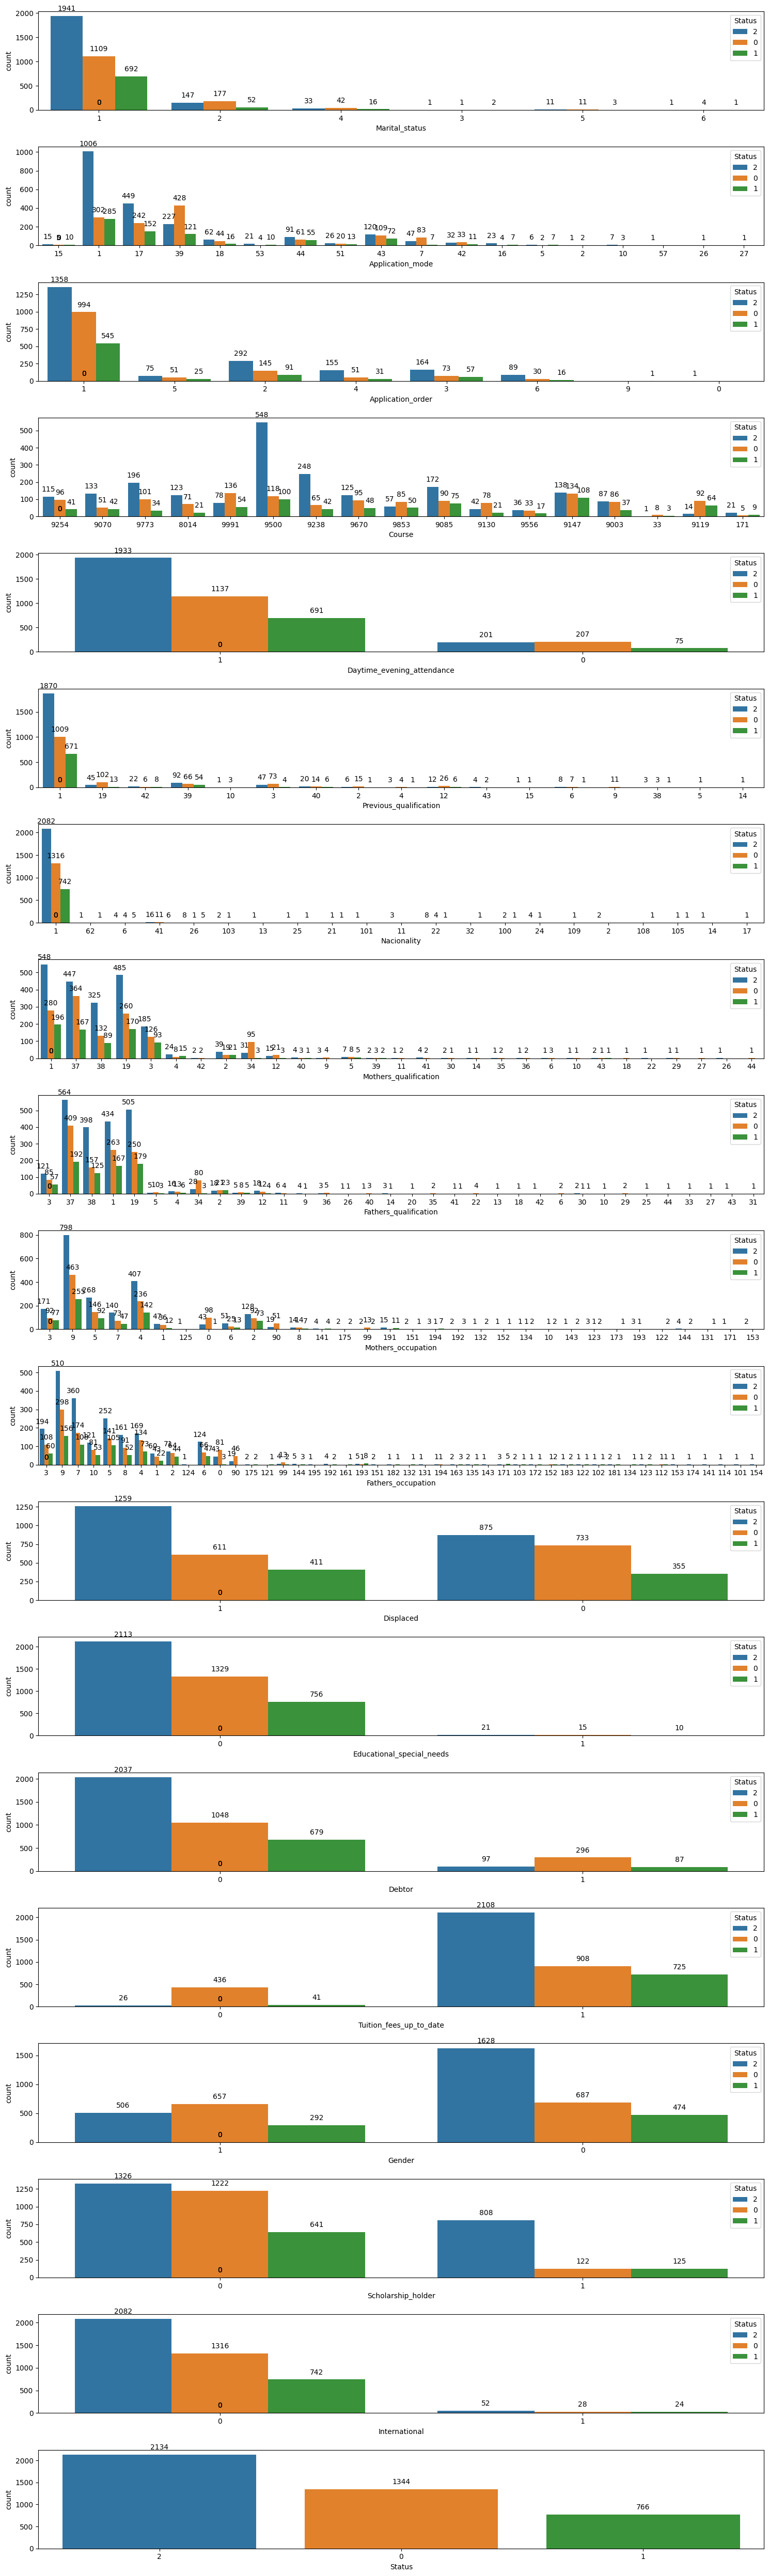

In [128]:
# Melihat plot kategori
def categorical_plot(features, df, segment_feature=None):
    fig, ax = plt.subplots(len(features), 1, figsize=(15, 50))
    
    # Iterasi melalui setiap feature untuk membuat plot
    for i, feature in enumerate(features):
        if segment_feature:
            # Jika ada segment_feature, plot dengan hue di subplot yang sesuai
            sns.countplot(data=df, x=feature, hue=segment_feature, ax=ax[i])
        else:
            # Jika tidak ada segment_feature, plot tanpa hue di subplot yang lain
            sns.countplot(data=df, x=feature, ax=ax[i])
        
        # Tambahkan teks di atas setiap bar dalam plot
        for p in ax[i].patches:
            ax[i].annotate(format(p.get_height(), '.0f'), 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha='center', va='center', 
                           xytext=(0, 10), 
                           textcoords='offset points')
    
    plt.tight_layout()
    plt.show()

categorical_plot(
    features=categorical,
    df=df,
    segment_feature='Status'
)

Terdapat data-data yang timpang sehingga tidak dapat diambil informasinya seperti Marital status, Application order, Previous qualification, Nacionality, Educational special needs, Debtor, Tuition fees up to date, dan International sehingga akan dihapus

In [129]:
df.columns

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime_evening_attendance', 'Previous_qualification',
       'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification',
       'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
       'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved',
       'Curricular_units_2nd_sem_without_evaluations', 'Unemployment_rate',
       'Inflation_rate', 'GD

In [130]:
# Menghapus data yang timpang
data_hapus_categorical = ['Marital_status', 'Application_order', 'Previous_qualification', 'Nacionality',
                          'Educational_special_needs', 'Debtor', 'Tuition_fees_up_to_date', 'International',
                          'Daytime_evening_attendance']

df = df.drop(columns=data_hapus_categorical)
df.head()

,Application_mode,Course,Previous_qualification_grade,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Gender,...,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status,Ratio_approved_1st_sem,Ratio_approved_2nd_sem
1,15,9254,160.0,1,3,3,3,142.5,1,1,...,6,6,6,0,13.9,-0.3,0.79,2,1.000000,1.000000
2,1,9070,122.0,37,37,9,9,124.8,1,1,...,6,0,0,0,10.8,1.4,1.74,0,0.000000,0.000000
3,17,9773,122.0,38,37,5,3,119.6,1,0,...,6,10,5,0,9.4,-0.8,-3.12,2,1.000000,0.833333
4,39,8014,100.0,37,38,9,9,141.5,0,0,...,6,6,6,0,13.9,-0.3,0.79,2,0.833333,1.000000
5,39,9991,133.1,37,37,9,7,114.8,0,1,...,5,17,5,5,16.2,0.3,-0.92,2,1.000000,1.000000


In [131]:
# Melihat semua data yang memiliki tipe data kategori
categorical = df.select_dtypes(include=['object']).columns.tolist()
categorical

['Application_mode',
 'Course',
 'Mothers_qualification',
 'Fathers_qualification',
 'Mothers_occupation',
 'Fathers_occupation',
 'Displaced',
 'Gender',
 'Scholarship_holder',
 'Status']

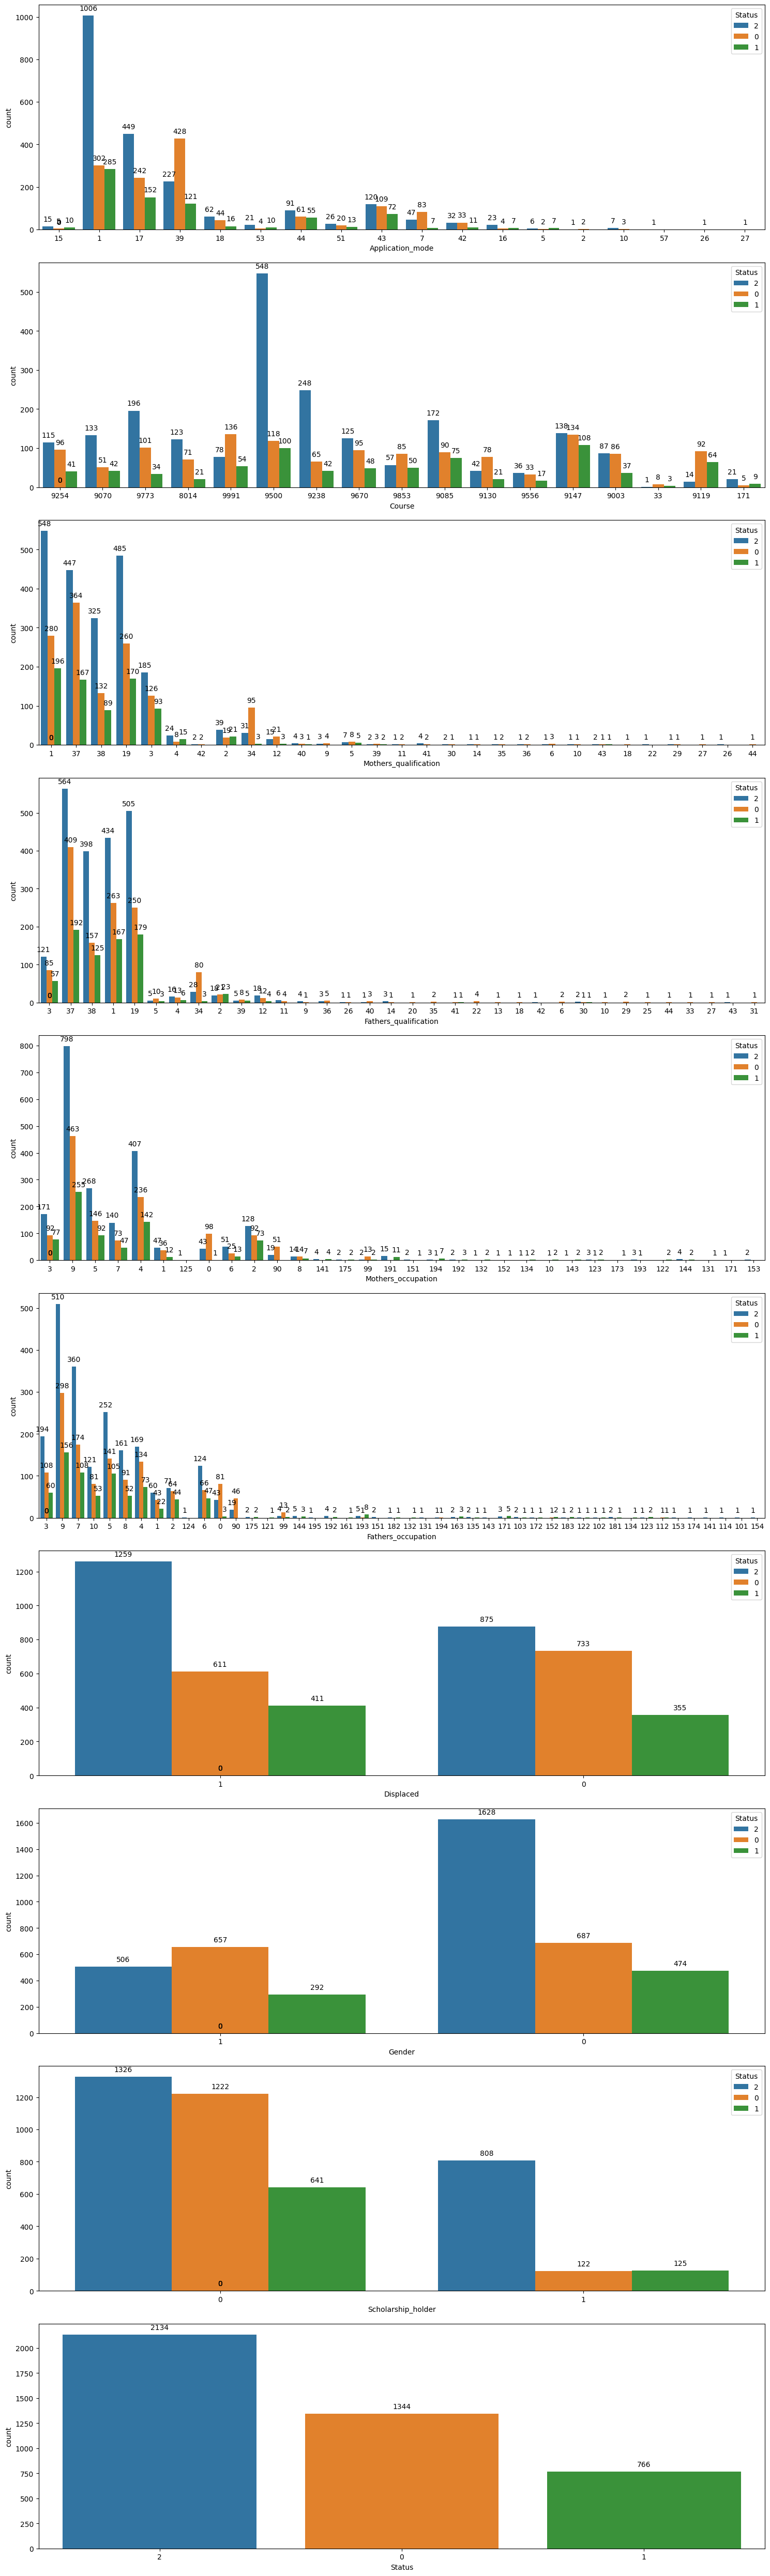

In [132]:
# Melihat plot kategori
def categorical_plot(features, df, segment_feature=None):
    fig, ax = plt.subplots(len(features), 1, figsize=(15, 50))
    
    # Iterasi melalui setiap feature untuk membuat plot
    for i, feature in enumerate(features):
        if segment_feature:
            # Jika ada segment_feature, plot dengan hue di subplot yang sesuai
            sns.countplot(data=df, x=feature, hue=segment_feature, ax=ax[i])
        else:
            # Jika tidak ada segment_feature, plot tanpa hue di subplot yang lain
            sns.countplot(data=df, x=feature, ax=ax[i])
        
        # Tambahkan teks di atas setiap bar dalam plot
        for p in ax[i].patches:
            ax[i].annotate(format(p.get_height(), '.0f'), 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha='center', va='center', 
                           xytext=(0, 10), 
                           textcoords='offset points')
    
    plt.tight_layout()
    plt.show()

categorical_plot(
    features=categorical,
    df=df,
    segment_feature='Status'
)

In [133]:
categorical

['Application_mode',
 'Course',
 'Mothers_qualification',
 'Fathers_qualification',
 'Mothers_occupation',
 'Fathers_occupation',
 'Displaced',
 'Gender',
 'Scholarship_holder',
 'Status']

In [134]:
df['Application_mode'].value_counts()

Application_mode
1     1593
17     843
39     776
43     301
44     207
7      137
18     122
42      76
51      59
53      35
16      34
15      30
5       15
10      10
2        3
57       1
26       1
27       1
Name: count, dtype: int64

In [135]:
# Melihat semua data yang memiliki tipe data numeric
numerical = df.select_dtypes(include=[np.number]).columns.tolist()
numerical

['Previous_qualification_grade',
 'Admission_grade',
 'Age_at_enrollment',
 'Curricular_units_1st_sem_credited',
 'Curricular_units_1st_sem_enrolled',
 'Curricular_units_1st_sem_evaluations',
 'Curricular_units_1st_sem_approved',
 'Curricular_units_1st_sem_without_evaluations',
 'Curricular_units_2nd_sem_credited',
 'Curricular_units_2nd_sem_enrolled',
 'Curricular_units_2nd_sem_evaluations',
 'Curricular_units_2nd_sem_approved',
 'Curricular_units_2nd_sem_without_evaluations',
 'Unemployment_rate',
 'Inflation_rate',
 'GDP',
 'Ratio_approved_1st_sem',
 'Ratio_approved_2nd_sem']

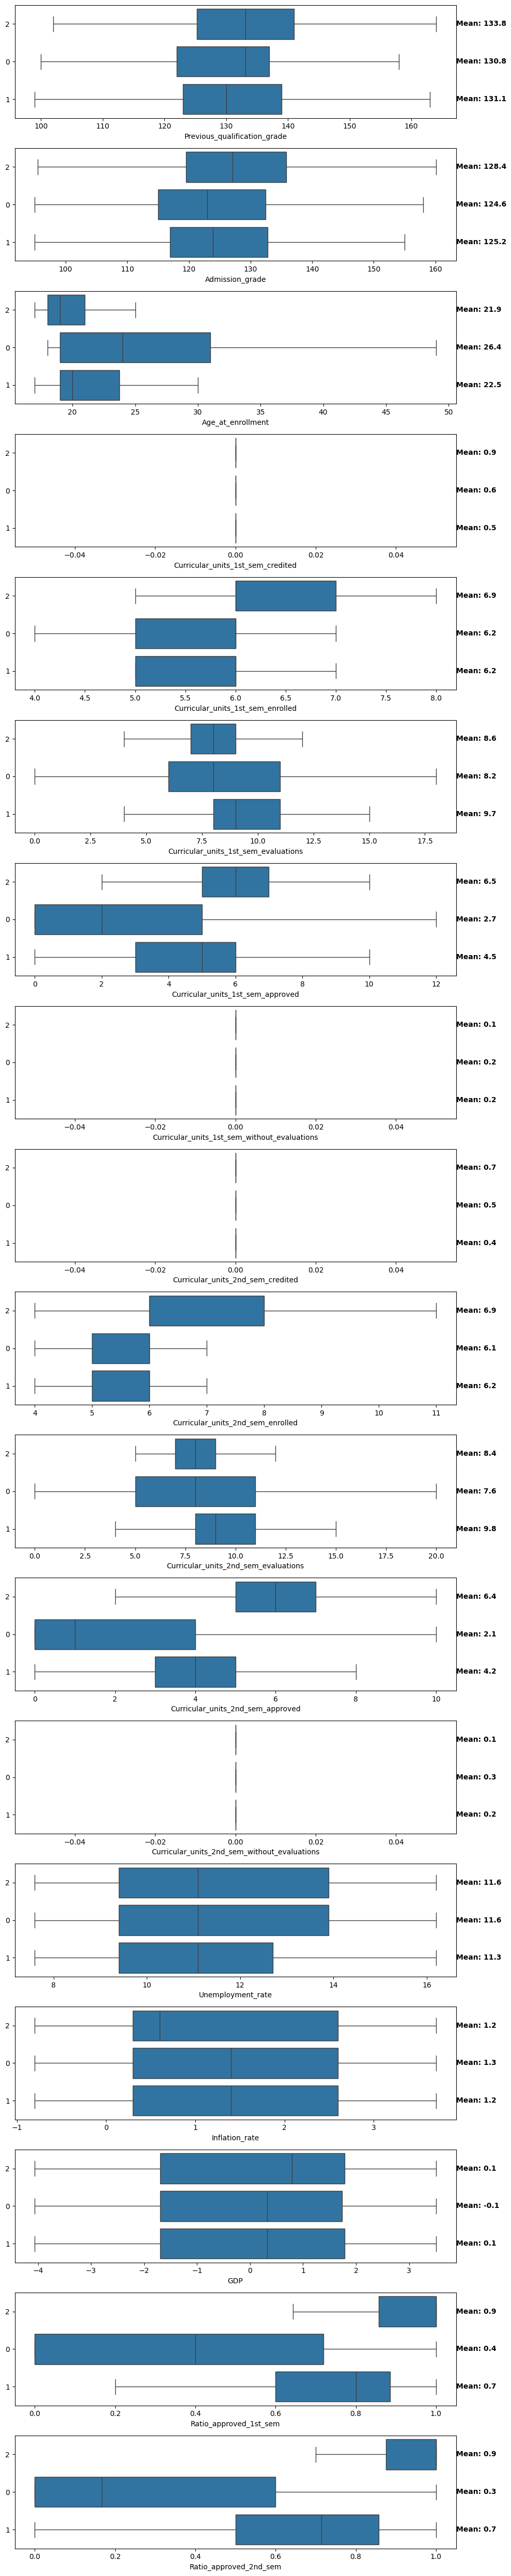

In [136]:
# Melihat plot numeric
def numerical_dis_plot(features, df, segment_feature=None, showfliers=True):
    fig, ax = plt.subplots(len(features), 1, figsize=(10, 50))
    
    for i, feature in enumerate(features):
        if segment_feature:
            sns.boxplot(y=segment_feature, x=feature, data=df, ax=ax[i], showfliers=showfliers)
            ax[i].set_ylabel(None)
            
            for tick, label in enumerate(ax[i].get_yticklabels()):
                cat = label.get_text()
                mean_value = df[df[segment_feature] == cat][feature].mean()
                mean_text = f'Mean: {mean_value:.1f}'
                ax[i].text(ax[i].get_xlim()[1], tick, mean_text,
                           verticalalignment='center', size='medium', color='black', weight='semibold')
        else:
            sns.boxplot(x=feature, data=df, ax=ax[i], showfliers=showfliers)
            mean_value = df[feature].mean()
            mean_text = f'Mean: {mean_value:.1f}'
            ax[i].text(ax[i].get_xlim()[1], 0, mean_text,
                       verticalalignment='center', size='medium', color='black', weight='semibold')
    
    plt.tight_layout()
    plt.show()

numerical_dis_plot(
    features=numerical,
    df=df,
    segment_feature='Status',
    showfliers=False 
)


In [137]:
numerical

['Previous_qualification_grade',
 'Admission_grade',
 'Age_at_enrollment',
 'Curricular_units_1st_sem_credited',
 'Curricular_units_1st_sem_enrolled',
 'Curricular_units_1st_sem_evaluations',
 'Curricular_units_1st_sem_approved',
 'Curricular_units_1st_sem_without_evaluations',
 'Curricular_units_2nd_sem_credited',
 'Curricular_units_2nd_sem_enrolled',
 'Curricular_units_2nd_sem_evaluations',
 'Curricular_units_2nd_sem_approved',
 'Curricular_units_2nd_sem_without_evaluations',
 'Unemployment_rate',
 'Inflation_rate',
 'GDP',
 'Ratio_approved_1st_sem',
 'Ratio_approved_2nd_sem']

In [138]:
# Menghitung nilai unik dalam fitur 
df['Curricular_units_1st_sem_without_evaluations'].value_counts()

Curricular_units_1st_sem_without_evaluations
0     3950
1      153
2       79
3       23
4       15
6        6
7        6
5        5
8        4
12       2
10       1
Name: count, dtype: int64

In [139]:
# Menghitung nilai unik dalam fitur 
df['Curricular_units_1st_sem_credited'].value_counts()

Curricular_units_1st_sem_credited
0     3667
2       94
1       85
3       69
6       51
4       47
7       41
5       41
8       31
9       27
11      17
14      15
10      15
13      13
12      12
15       5
18       4
16       3
17       3
19       2
20       2
Name: count, dtype: int64

In [140]:
# Menghitung nilai unik dalam fitur 
df['Curricular_units_2nd_sem_credited'].value_counts()

Curricular_units_2nd_sem_credited
0     3714
1      107
2       92
4       78
5       68
3       49
6       26
11      20
7       16
9       15
12      14
10      13
8       12
13       9
14       4
15       2
16       2
18       2
19       1
Name: count, dtype: int64

In [141]:
# Menghitung nilai unik dalam fitur 
df['Curricular_units_2nd_sem_without_evaluations'].value_counts()

Curricular_units_2nd_sem_without_evaluations
0     3962
1      140
2       48
3       35
4       21
5       17
6        8
8        6
7        5
12       2
Name: count, dtype: int64

In [142]:
# Menghitung nilai unik dalam fitur 
df['Curricular_units_2nd_sem_without_evaluations'].value_counts()

Curricular_units_2nd_sem_without_evaluations
0     3962
1      140
2       48
3       35
4       21
5       17
6        8
8        6
7        5
12       2
Name: count, dtype: int64

Terdapat data-data yang timpang sehingga tidak dapat diambil informasinya seperti Curricular_units_1st_sem_without_evaluations, Curricular_units_1st_sem_credited, Curricular_units_2nd_sem_credited, Curricular_units_2nd_sem_without_evaluations, Curricular_units_2nd_sem_without_evaluations sehingga akan dihapus

In [143]:
# Menghapus nilai numerical yang timpang
df = df.drop(columns=['Curricular_units_1st_sem_without_evaluations', 'Curricular_units_1st_sem_credited',
                      'Curricular_units_2nd_sem_credited', 'Curricular_units_2nd_sem_without_evaluations',
                      'Curricular_units_2nd_sem_without_evaluations'])
df

,Application_mode,Course,Previous_qualification_grade,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Gender,...,Curricular_units_1st_sem_approved,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Unemployment_rate,Inflation_rate,GDP,Status,Ratio_approved_1st_sem,Ratio_approved_2nd_sem
1,15,9254,160.0,1,3,3,3,142.5,1,1,...,6,6,6,6,13.9,-0.3,0.79,2,1.000000,1.000000
2,1,9070,122.0,37,37,9,9,124.8,1,1,...,0,6,0,0,10.8,1.4,1.74,0,0.000000,0.000000
3,17,9773,122.0,38,37,5,3,119.6,1,0,...,6,6,10,5,9.4,-0.8,-3.12,2,1.000000,0.833333
4,39,8014,100.0,37,38,9,9,141.5,0,0,...,5,6,6,6,13.9,-0.3,0.79,2,0.833333,1.000000
5,39,9991,133.1,37,37,9,7,114.8,0,1,...,5,5,17,5,16.2,0.3,-0.92,2,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,9773,125.0,1,1,5,4,122.2,0,1,...,5,6,8,5,15.5,2.8,-4.06,2,0.833333,0.833333
4420,1,9773,120.0,1,1,9,9,119.0,1,0,...,6,6,6,2,11.1,0.6,2.02,0,1.000000,0.333333
4421,1,9500,154.0,37,37,9,9,149.5,1,0,...,7,8,9,1,13.9,-0.3,0.79,0,1.000000,0.125000
4422,1,9147,180.0,37,37,7,4,153.8,1,0,...,5,5,6,5,9.4,-0.8,-3.12,2,1.000000,1.000000


In [144]:
# Melihat semua data yang memiliki tipe data numeric
numerical = df.select_dtypes(include=[np.number]).columns.tolist()
numerical

['Previous_qualification_grade',
 'Admission_grade',
 'Age_at_enrollment',
 'Curricular_units_1st_sem_enrolled',
 'Curricular_units_1st_sem_evaluations',
 'Curricular_units_1st_sem_approved',
 'Curricular_units_2nd_sem_enrolled',
 'Curricular_units_2nd_sem_evaluations',
 'Curricular_units_2nd_sem_approved',
 'Unemployment_rate',
 'Inflation_rate',
 'GDP',
 'Ratio_approved_1st_sem',
 'Ratio_approved_2nd_sem']

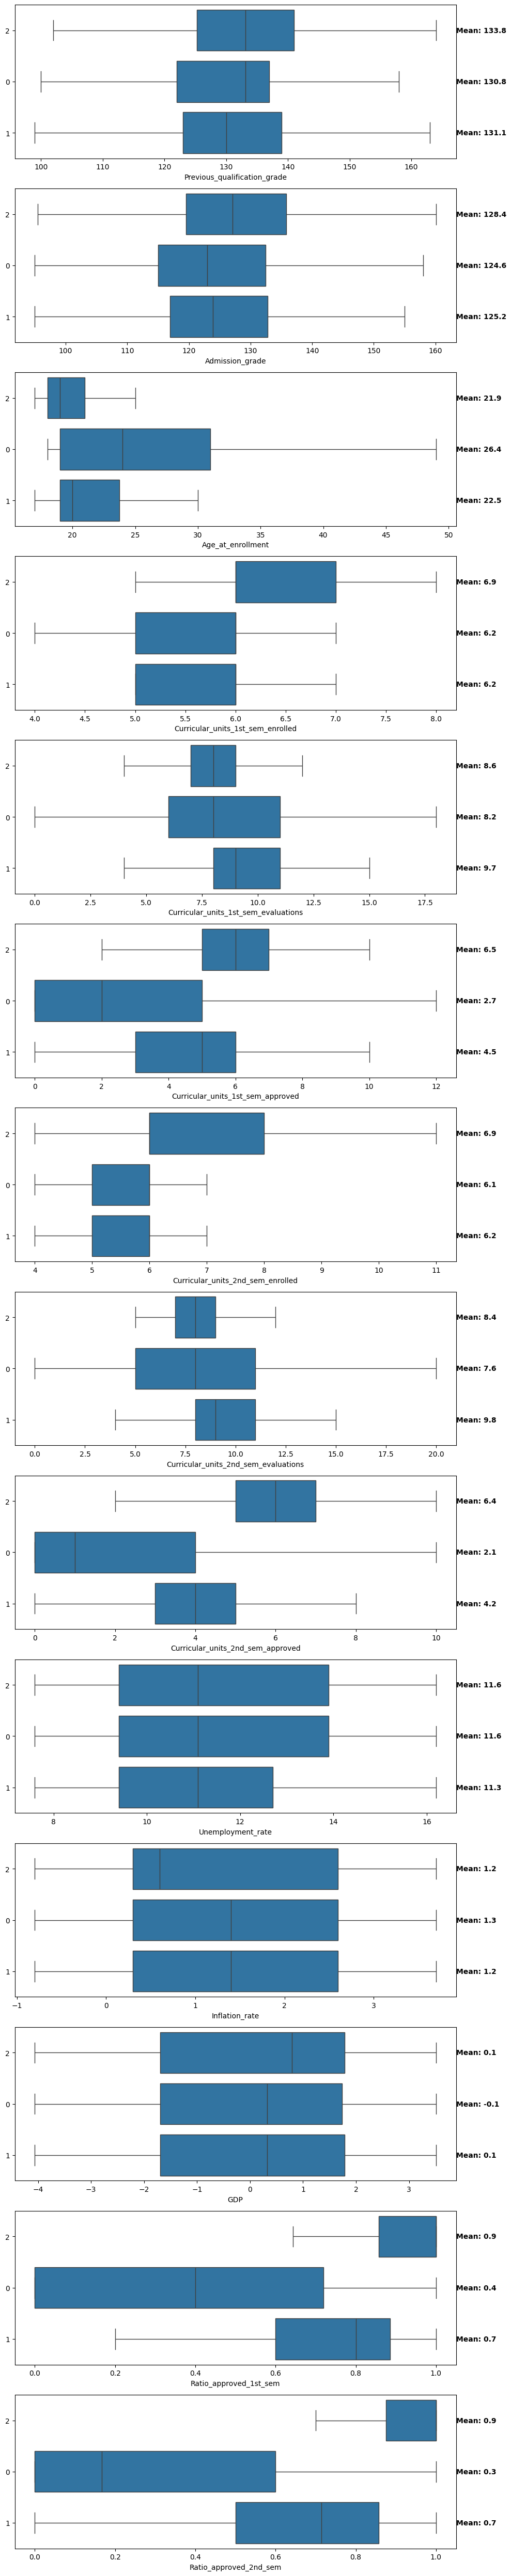

In [145]:
# Melihat plot numeric
def numerical_dis_plot(features, df, segment_feature=None, showfliers=True):
    fig, ax = plt.subplots(len(features), 1, figsize=(10, 50))
    
    for i, feature in enumerate(features):
        if segment_feature:
            sns.boxplot(y=segment_feature, x=feature, data=df, ax=ax[i], showfliers=showfliers)
            ax[i].set_ylabel(None)
            
            for tick, label in enumerate(ax[i].get_yticklabels()):
                cat = label.get_text()
                mean_value = df[df[segment_feature] == cat][feature].mean()
                mean_text = f'Mean: {mean_value:.1f}'
                ax[i].text(ax[i].get_xlim()[1], tick, mean_text,
                           verticalalignment='center', size='medium', color='black', weight='semibold')
        else:
            sns.boxplot(x=feature, data=df, ax=ax[i], showfliers=showfliers)
            mean_value = df[feature].mean()
            mean_text = f'Mean: {mean_value:.1f}'
            ax[i].text(ax[i].get_xlim()[1], 0, mean_text,
                       verticalalignment='center', size='medium', color='black', weight='semibold')
    
    plt.tight_layout()
    plt.show()

numerical_dis_plot(
    features=numerical,
    df=df,
    segment_feature='Status',
    showfliers=False 
)

## Modeling

Karena requestnya adalah mahasiswa akan melakukan dropout atau tidak, maka output target enrolled dan graduate akan disatukan menjadi '1' dan output target dropout akan menjadi '0'

In [146]:
# Mengubah nilai target 1 dan 2 menjadi 1
df['Status'] = df['Status'].replace({'1': '1', '2': '1'})

print(df)

     Application_mode Course  Previous_qualification_grade  \
1                  15   9254                         160.0   
2                   1   9070                         122.0   
3                  17   9773                         122.0   
4                  39   8014                         100.0   
5                  39   9991                         133.1   
...               ...    ...                           ...   
4419                1   9773                         125.0   
4420                1   9773                         120.0   
4421                1   9500                         154.0   
4422                1   9147                         180.0   
4423               10   9773                         152.0   

     Mothers_qualification Fathers_qualification Mothers_occupation  \
1                        1                     3                  3   
2                       37                    37                  9   
3                       38                

In [147]:
df['Status'].value_counts()

Status
1    2900
0    1344
Name: count, dtype: int64

Karena data target saya timpang, saya akan melakukan teknik undersampling untuk target yang outputnya 1

In [148]:
# Pisahkan data menjadi dua bagian berdasarkan kelasnya
df_class_0 = df[df['Status'] == '0']
df_class_1 = df[df['Status'] == '1']

In [149]:
# Undersample kelas 1
df_class_1_undersampled = resample(df_class_1, 
                                   replace=False,    # Tidak mengganti (sampling tanpa penggantian)
                                   n_samples=len(df_class_0), # Sesuaikan jumlahnya dengan kelas 0
                                   random_state=42)  # Untuk memastikan hasil yang konsisten

In [150]:
# Menggabungkan kembali data yang diundersample
df_undersampled = pd.concat([df_class_0, df_class_1_undersampled])

In [151]:
# Mengecek apakah target sudah setara
df_undersampled['Status'].value_counts()

Status
0    1344
1    1344
Name: count, dtype: int64

In [152]:
# Melakukan train-test-split
X = df_undersampled.drop(columns='Status')
y = df_undersampled['Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2150, 23), (538, 23), (2150,), (538,))

In [153]:
# Melihat nilai numeric
numerical 

['Previous_qualification_grade',
 'Admission_grade',
 'Age_at_enrollment',
 'Curricular_units_1st_sem_enrolled',
 'Curricular_units_1st_sem_evaluations',
 'Curricular_units_1st_sem_approved',
 'Curricular_units_2nd_sem_enrolled',
 'Curricular_units_2nd_sem_evaluations',
 'Curricular_units_2nd_sem_approved',
 'Unemployment_rate',
 'Inflation_rate',
 'GDP',
 'Ratio_approved_1st_sem',
 'Ratio_approved_2nd_sem']

In [154]:
# Menentukan nilai categorical
categorical = ['Application_mode',
 'Course',
 'Mothers_qualification',
 'Fathers_qualification',
 'Mothers_occupation',
 'Fathers_occupation',
 'Displaced',
 'Gender',
 'Scholarship_holder',]
categorical

['Application_mode',
 'Course',
 'Mothers_qualification',
 'Fathers_qualification',
 'Mothers_occupation',
 'Fathers_occupation',
 'Displaced',
 'Gender',
 'Scholarship_holder']

In [155]:
# melakukan preprocessing
numerical_pipeline = Pipeline([
    ('imputasi', SimpleImputer(strategy='median')),
    ('scaling', MinMaxScaler())
])

ordinal_pipeline = Pipeline([
	('imputer', SimpleImputer(strategy='most_frequent')),
	('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

preprocessor = ColumnTransformer([
    ('preprocessing numerical', numerical_pipeline, numerical),
    ('preprocessing ordinal', ordinal_pipeline, categorical)   
])

In [156]:
# Menentukan algoritma
algo = RandomForestClassifier()

model = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('rfc', algo)
])

model.fit(X_train, y_train)

# Prediksi menggunakan model
y_pred = model.predict(X_test)

## Evaluation

In [157]:
report = classification_report(y_test, y_pred)

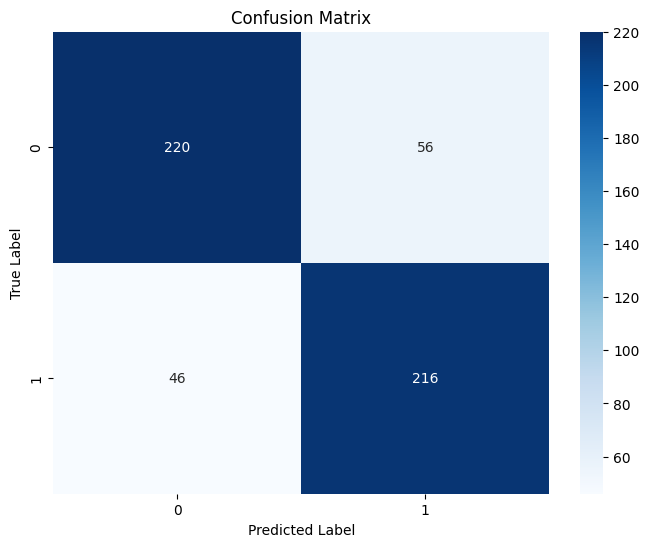

In [158]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # 'd' means integer format
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [159]:
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       276
           1       0.79      0.84      0.82       262

    accuracy                           0.82       538
   macro avg       0.82      0.82      0.82       538
weighted avg       0.82      0.82      0.82       538



In [160]:
# Menyimpan model
with open('model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

##### Upload data

In [161]:
# Menimpan data yang sudah diolah
df.to_csv('data_submission_2.csv', index=False)

In [162]:
# Membaca data yang sudah diolah
df = pd.read_csv('data_submission_2.csv')
df

,Application_mode,Course,Previous_qualification_grade,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Gender,...,Curricular_units_1st_sem_approved,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Unemployment_rate,Inflation_rate,GDP,Status,Ratio_approved_1st_sem,Ratio_approved_2nd_sem
0,15,9254,160.0,1,3,3,3,142.5,1,1,...,6,6,6,6,13.9,-0.3,0.79,1,1.000000,1.000000
1,1,9070,122.0,37,37,9,9,124.8,1,1,...,0,6,0,0,10.8,1.4,1.74,0,0.000000,0.000000
2,17,9773,122.0,38,37,5,3,119.6,1,0,...,6,6,10,5,9.4,-0.8,-3.12,1,1.000000,0.833333
3,39,8014,100.0,37,38,9,9,141.5,0,0,...,5,6,6,6,13.9,-0.3,0.79,1,0.833333,1.000000
4,39,9991,133.1,37,37,9,7,114.8,0,1,...,5,5,17,5,16.2,0.3,-0.92,1,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4239,1,9773,125.0,1,1,5,4,122.2,0,1,...,5,6,8,5,15.5,2.8,-4.06,1,0.833333,0.833333
4240,1,9773,120.0,1,1,9,9,119.0,1,0,...,6,6,6,2,11.1,0.6,2.02,0,1.000000,0.333333
4241,1,9500,154.0,37,37,9,9,149.5,1,0,...,7,8,9,1,13.9,-0.3,0.79,0,1.000000,0.125000
4242,1,9147,180.0,37,37,7,4,153.8,1,0,...,5,5,6,5,9.4,-0.8,-3.12,1,1.000000,1.000000
